<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [111]:
# Import necessary libraries
import torch
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.xpu import device

In [112]:
# Setup device-agnostic code
torch.cuda.is_available() , torch.cuda.get_device_name(0)


(True, 'Quadro T2000')

In [113]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [114]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


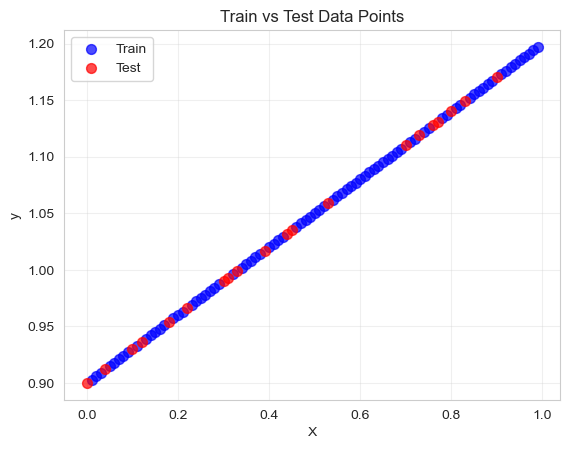

In [115]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train data
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Train', s=50)

# Test data
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Test', s=50)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Train vs Test Data Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

- the differnce ie that the data in train_test_split is chosen randomly but in the below code it is in order

In [116]:

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

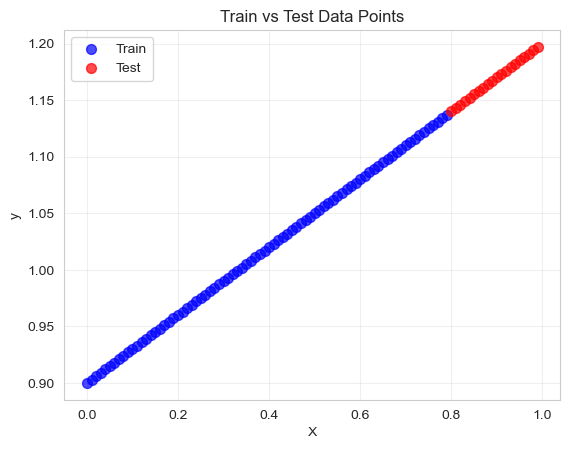

In [117]:
# Plot the training and testing data 
# Train data
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Train', s=50)

# Test data
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Test', s=50)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Train vs Test Data Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [118]:
# Create PyTorch linear regression model by subclassing nn.Module
import torch.nn as nn

class LRModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1 ,dtype= torch.float32) ,
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1 , dtype = torch.float32) ,
                                 requires_grad=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


```python
#we can build it also with nn.Linear() method
class LRModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self , x):
        return self.linear_layer(x)
```

In [119]:
# Instantiate the model and put it to the target device
LRModel().to(device)

LRModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [120]:
# Create the loss function and optimizer
model = LRModel().to(device)
loss_f = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [121]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 1000
train_loss_values = []
test_loss_values = []
epoch_count = []

# Send data to target device (FIXED: Convert to tensors first, then move to device)
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

for epoch in range(epochs):
    model.train()

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_f(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Put model in evaluation mode and setup inference context
    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_f(test_pred, y_test)  # FIXED: Removed .type(torch.float)

    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.cpu().detach().numpy())

        print(f"Epoch: {epoch} | MAE Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

C:\Users\workstation\AppData\Local\Temp\ipykernel_20536\2053776763.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
C:\Users\workstation\AppData\Local\Temp\ipykernel_20536\2053776763.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
C:\Users\workstation\AppData\Local\Temp\ipykernel_20536\2053776763.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32).to(de

Epoch: 0 | MAE Train Loss: 1.6484 | Test Loss: 2.3462
Epoch: 20 | MAE Train Loss: 1.4172 | Test Loss: 2.0755
Epoch: 40 | MAE Train Loss: 1.1859 | Test Loss: 1.8048
Epoch: 60 | MAE Train Loss: 0.9547 | Test Loss: 1.5341
Epoch: 80 | MAE Train Loss: 0.7235 | Test Loss: 1.2634
Epoch: 100 | MAE Train Loss: 0.4923 | Test Loss: 0.9927
Epoch: 120 | MAE Train Loss: 0.2908 | Test Loss: 0.7408
Epoch: 140 | MAE Train Loss: 0.2025 | Test Loss: 0.5696
Epoch: 160 | MAE Train Loss: 0.1690 | Test Loss: 0.4635
Epoch: 180 | MAE Train Loss: 0.1547 | Test Loss: 0.3997
Epoch: 200 | MAE Train Loss: 0.1459 | Test Loss: 0.3595
Epoch: 220 | MAE Train Loss: 0.1387 | Test Loss: 0.3329
Epoch: 240 | MAE Train Loss: 0.1317 | Test Loss: 0.3107
Epoch: 260 | MAE Train Loss: 0.1249 | Test Loss: 0.2944
Epoch: 280 | MAE Train Loss: 0.1180 | Test Loss: 0.2784
Epoch: 300 | MAE Train Loss: 0.1112 | Test Loss: 0.2621
Epoch: 320 | MAE Train Loss: 0.1043 | Test Loss: 0.2457
Epoch: 340 | MAE Train Loss: 0.0975 | Test Loss: 0.229

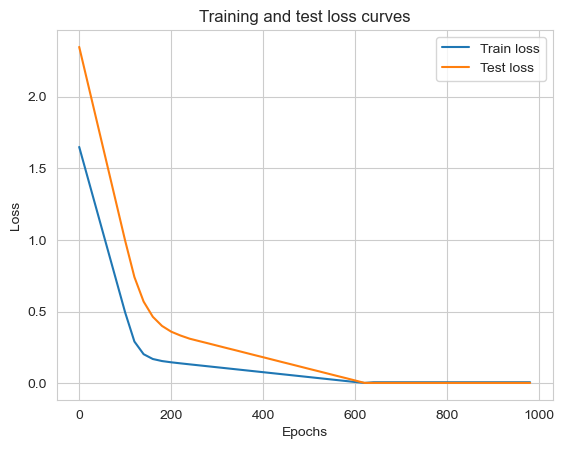

In [122]:

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [123]:
model.state_dict()
# the w & b are near to the values we initialized before training

OrderedDict([('weights', tensor([0.2911], device='cuda:0')),
             ('bias', tensor([0.8967], device='cuda:0'))])

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

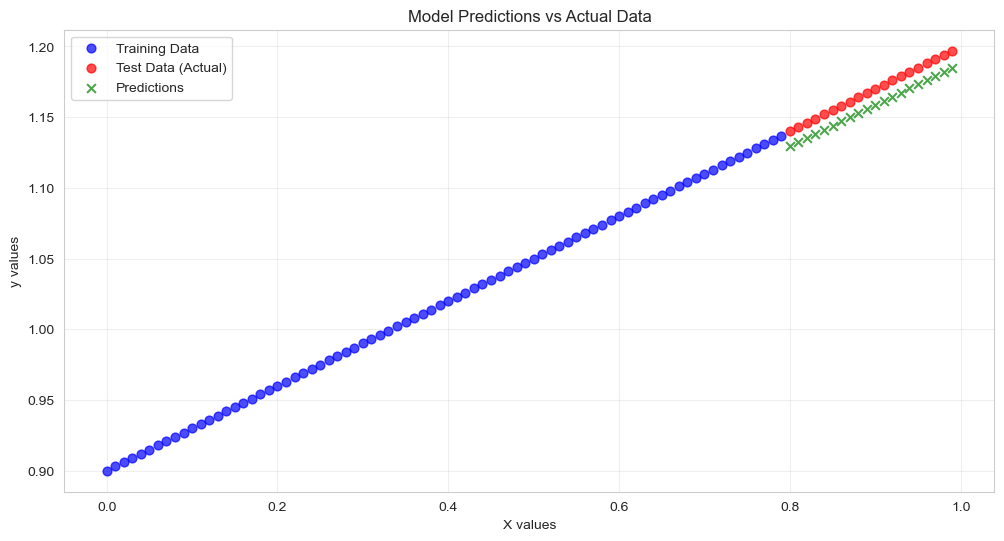

In [124]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)

# Move all tensors to CPU before plotting
X_train_cpu = X_train.cpu()
y_train_cpu = y_train.cpu()
X_test_cpu = X_test.cpu()
y_test_cpu = y_test.cpu()
y_pred_cpu = y_pred.cpu().detach().numpy()

# Plot the predictions
plt.figure(figsize=(12, 6))

# Plot training data
plt.scatter(X_train_cpu, y_train_cpu,
            c="blue", s=40, label="Training Data", alpha=0.7)

# Plot test data
plt.scatter(X_test_cpu, y_test_cpu,
            c="red", s=40, label="Test Data (Actual)", alpha=0.7)

# Plot predictions
plt.scatter(X_test_cpu, y_pred_cpu,
            c="green", s=40, label="Predictions", alpha=0.7, marker="x")

plt.title("Model Predictions vs Actual Data")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [125]:
from pathlib import Path

# 1. Create models directory

Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

Model_Name = "LRModel.pth"
Model_Save_Path = Model_Path / Model_Name

# 3. Save the model state dict

print(f"Saving model to: {Model_Save_Path}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=Model_Save_Path)

Saving model to: models\LRModel.pth


In [126]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loaded_model = LRModel().to(device)
loaded_model.load_state_dict(torch.load(Model_Save_Path,weights_only=True))

<All keys matched successfully>

In [127]:
# Make predictions with loaded model and compare them to the previous

loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_pred == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# *DONE*